<a href="https://colab.research.google.com/github/Darsangmdd/Suppy-Chain-analysis-/blob/main/SCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supply Chain analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

## Data reading and cleaning

In [ ]:
df = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')
df = df.drop(['Type','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
        'Product Card Id','Product Category Id','Order Status','Category Id','Benefit per order','Order Profit Per Order',
              'Order Item Profit Ratio','Order Customer Id','Customer Id','Order Item Discount Rate','Department Id',
             'Order Item Cardprod Id','Order Id','Customer Zipcode','Order Item Product Price','Sales per customer','Order Item Total','Days for shipment (scheduled)','Order Item Id'],axis=1)

## Exploratory Data Analysis

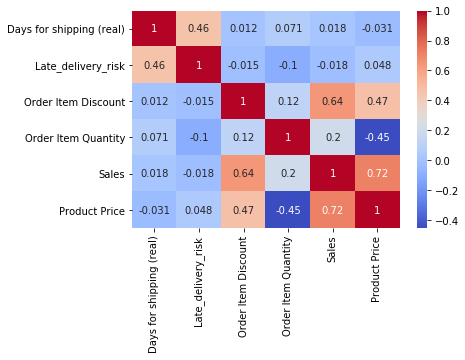

In [ ]:
sns.heatmap(df.corr(),cmap= 'coolwarm',annot=True)

## Heatmap shows high correlation between sales,product price and order item discount

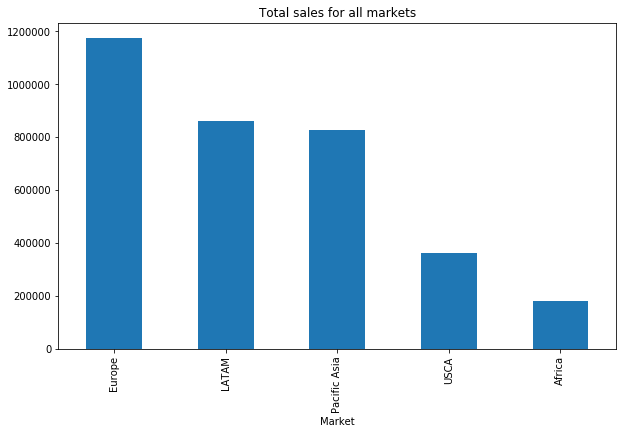

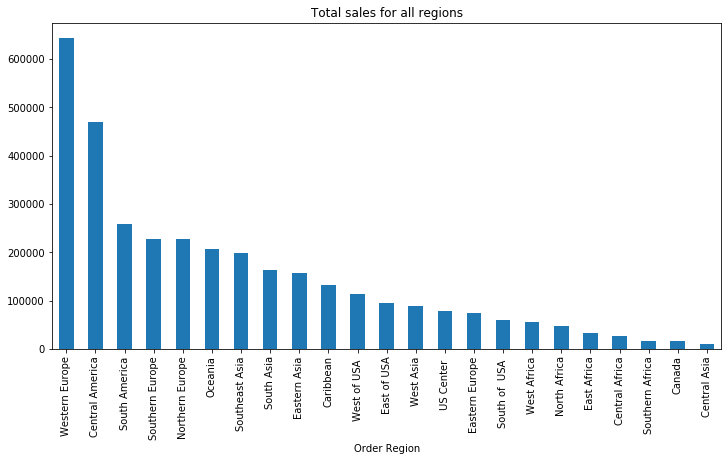

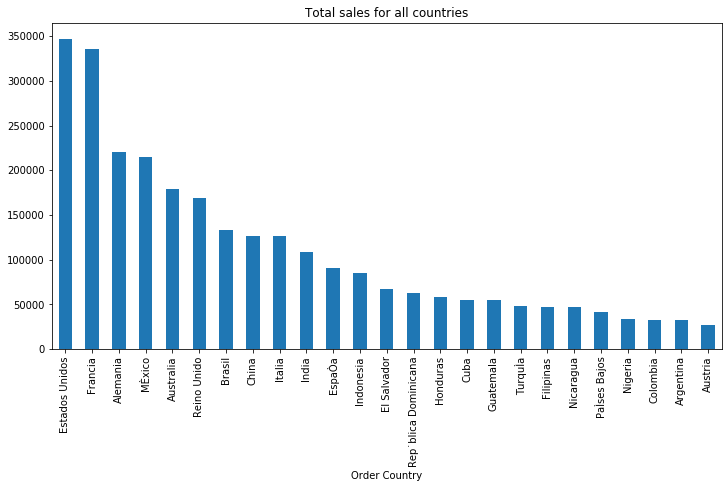

In [ ]:
df = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')
df['comp'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
market = df.groupby('Market') #Grouping by market
region = df.groupby('Order Region')#by region
country = df.groupby('Order Country')#by country
category = df.groupby('Category Name')
d_name = df.groupby('Department Name')
plt.figure(1)
market['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6), title="Total sales for all markets")
plt.figure(2)
region['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")
plt.figure(3)
country['Sales'].sum().nlargest(25).sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all countries")

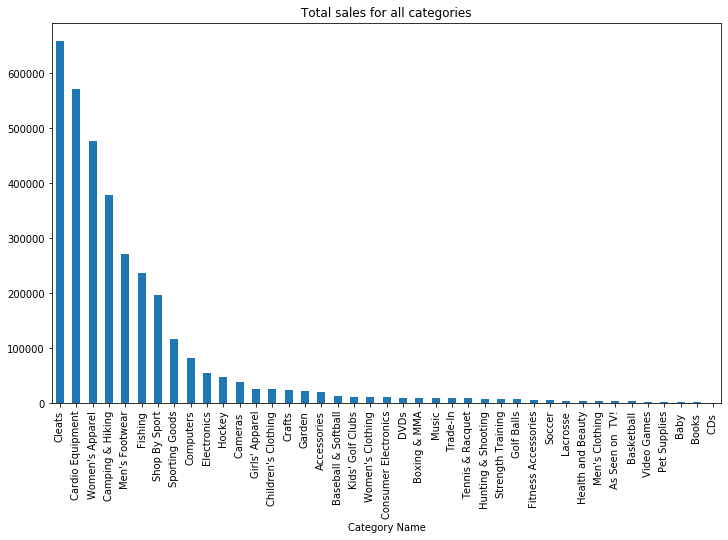

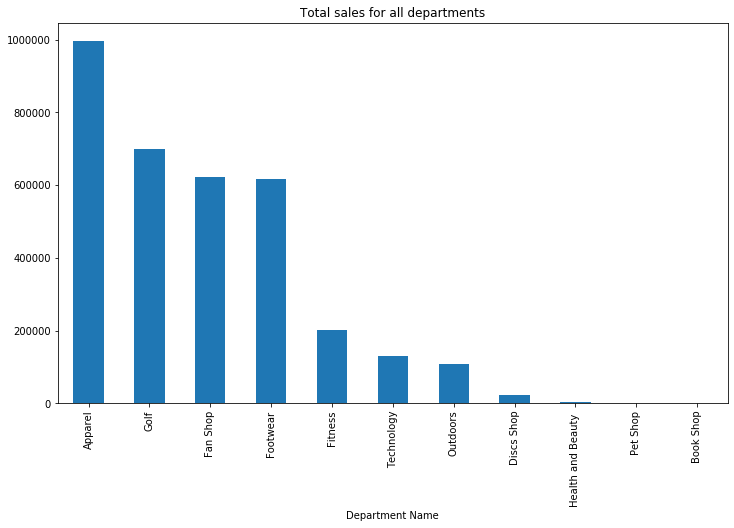

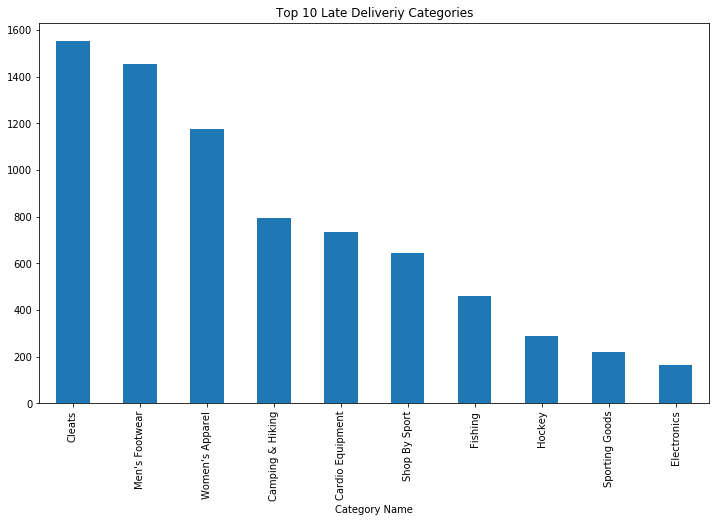

In [ ]:
plt.figure(4)
category['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,7), title="Total sales for all categories")
plt.figure(5)
d_name['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,7), title="Total sales for all departments")
plt.figure(6)
category['comp'].sum().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,7), title="Top 10 Late Deliveriy Categories")

In [ ]:
df = df.drop(['Type','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
        'Product Card Id','Product Category Id','Order Status','Category Id','Benefit per order','Order Profit Per Order',
              'Order Item Profit Ratio','Order Customer Id','Customer Id','Order Item Discount Rate','Department Id',
             'Order Item Cardprod Id','Order Id','Customer Zipcode','Order Item Product Price','Sales per customer','Order Item Total','Days for shipment (scheduled)','Order Item Id','comp'],axis=1)

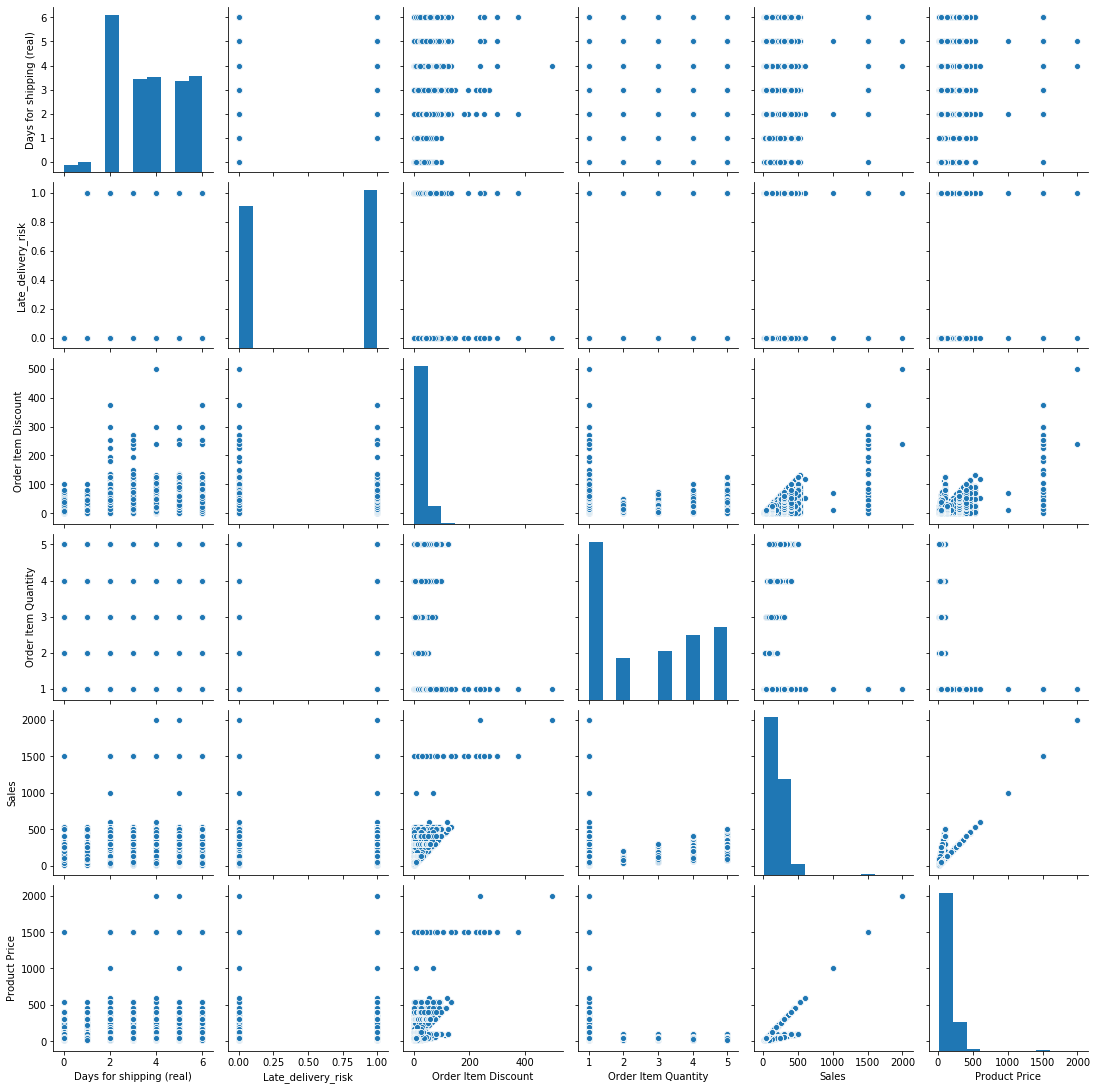

In [ ]:
sns.pairplot(df)

## Regression to determine days required for shipping

In [ ]:
df = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')
df = df.drop(['Type','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
        'Product Card Id','Product Category Id','Order Status','Category Id','Benefit per order','Order Profit Per Order',
              'Order Item Profit Ratio','Order Customer Id','Customer Id','Order Item Discount Rate','Department Id',
             'Order Item Cardprod Id','Order Id','Customer Zipcode','Order Item Product Price','Sales per customer','Order Item Total','Days for shipment (scheduled)','Order Item Id'],axis=1)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import utils

In [ ]:
dep = pd.get_dummies(df['Department Name'],drop_first=True)
mrkt = pd.get_dummies(df['Market'],drop_first=True)
cat = pd.get_dummies(df['Category Name'],drop_first=True)
state = pd.get_dummies(df['Customer State'],drop_first=True)
p_name = pd.get_dummies(df['Product Name'],drop_first=True)
df['Shipping Mode'] = df['Shipping Mode'].replace({'Standard Class':0,'Second Class':1,'First Class':2,'Same Day':3})
s_mode = df['Shipping Mode']
x1 = pd.concat([cat,dep,state,mrkt,p_name,s_mode],axis=1)
x2 = df[['Late_delivery_risk','Order Item Quantity','Sales','Product Price']]
X= pd.concat([x1,x2],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = df.iloc[:,0]

## Creating Pipelines for Random Forest, Decision Tree and Linear Regression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
pipeline_lr = Pipeline([('lrclassifier',LinearRegression())])
pipeline_dt = Pipeline([('pca2',PCA(n_components=20)),
                       ('dtclassifier',DecisionTreeRegressor())])
pipeline_rf = Pipeline([('pca3',PCA(n_components=20)),
                       ('rfclassifier',RandomForestRegressor())])
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf]
pipe_dict = {0:'Linear Regression',1:'Decision Tree',2:'Random Forest'}

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy: 0.7031286418049789
Decision Tree Test Accuracy: 0.654704553540798
Random Forest Test Accuracy: 0.7170620434151842


## Ridge and Lasso Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha':[1e-3,1e-2,1,5,6,7,8,9,10,11,12,14,15,18,19,20,21,22,23,25,26,30]}
ridge_regressor = GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1, 5, 6, 7, 8, 9, 10, 11, 12,
                                   14, 15, 18, 19, 20, 21, 22, 23, 25, 26,
                                   30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
0.6892119641285228


In [ ]:
lasso = Lasso()
parameters = {'alpha':[1e-8,1e-3,0.001,0.005,0.01,0.05,0.5,1,5]}
lasso_regressor = GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3910.2522670789417, tolerance: 2.5363723292636413
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3932.0814154439727, tolerance: 2.5620854935622313
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3885.6968804294206, tolerance: 2.554466628516934
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 0.001, 0.001, 0.005, 0.01, 0.05, 0.5,
                                   1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.005}
0.6903145442369786


In [ ]:
rfc = RandomForestRegressor()
mse = cross_val_score(rfc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

<IPython.core.display.Javascript object>

-0.7591398842806093


In [ ]:
dt = DecisionTreeRegressor()
mse = cross_val_score(rfc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

<IPython.core.display.Javascript object>

-0.7583839984209527


In [ ]:
ridge = Ridge()
parameters = {'alpha':[1e-3,1e-2,1,5,6,7,8,9,10,11,12,14,15,18,19,20,21,22,23,25,26,30]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1, 5, 6, 7, 8, 9, 10, 11, 12,
                                   14, 15, 18, 19, 20, 21, 22, 23, 25, 26,
                                   30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-0.755713672621922


In [ ]:
lasso = Lasso()
parameters = {'alpha':[1e-8,1e-3,0.001,0.005,0.01,0.05,0.5,1,5]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3910.2522670789417, tolerance: 2.5363723292636413
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3932.0814154439727, tolerance: 2.5620854935622313
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3885.6968804294206, tolerance: 2.554466628516934
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 0.001, 0.001, 0.005, 0.01, 0.05, 0.5,
                                   1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.005}
-0.7530671197799602


## Calculating R_2 score for all regression models

In [ ]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_linear = pipeline_lr.predict(X_test)
prediction_randomforest = pipeline_rf.predict(X_test)
prediction_decisiontree = pipeline_dt.predict(X_test)

In [ ]:
score1 = r2_score(y_test,prediction_ridge)
score2 = r2_score(y_test,prediction_lasso)
score3 = r2_score(y_test,prediction_linear)
score4 = r2_score(y_test,prediction_randomforest)
score5 = r2_score(y_test,prediction_decisiontree)
print("Ridge Score :{} , Lasso Score :{} , Multiple Linear Regression Score :{} , Random Forest Score :{} , Decision Tree Score: {}".format(score1,score2,score3,score4,score5))

Ridge Score :0.704922962876334 , Lasso Score :0.7052379710218502 , Multiple Linear Regression Score :0.7031286418049789 , Random Forest Score :0.7170620434151842 , Decision Tree Score: 0.654704553540798


## Checking MultiCollinearity

In [ ]:
import statsmodels.api as sm
X= pd.concat([x1,x2],axis=1)
y = df.iloc[:,0]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

<IPython.core.display.Javascript object>

                               OLS Regression Results                               
Dep. Variable:     Days for shipping (real)   R-squared:                       0.697
Model:                                  OLS   Adj. R-squared:                  0.694
Method:                       Least Squares   F-statistic:                     266.7
Date:                      Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                              12:32:02   Log-Likelihood:                -20789.
No. Observations:                     16383   AIC:                         4.186e+04
Df Residuals:                         16242   BIC:                         4.295e+04
Df Model:                               140                                         
Covariance Type:                  nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## ABC analysis by state

In [ ]:
df = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')
df = df.drop(['Type','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
        'Product Card Id','Product Category Id','Order Status','Category Id','Benefit per order','Order Profit Per Order',
              'Order Item Profit Ratio','Order Customer Id','Customer Id','Order Item Discount Rate','Department Id',
             'Order Item Cardprod Id','Order Id','Customer Zipcode','Order Item Product Price','Sales per customer','Order Item Total','Days for shipment (scheduled)','Order Item Id'],axis=1)

<IPython.core.display.Javascript object>

In [ ]:
df = df.groupby('Customer State').sum()
#Sorting and constructing column for cumulative values
df = df.sort_values('Sales',ascending=False)
df['CUMULATIVE'] = df['Sales'].cumsum(axis = 0)
df = df.reset_index()
x = df['CUMULATIVE'].iloc[-1]

In [ ]:
def ABC_category(value):
    if value > 0 and value < 0.8*x:
        return 'A'
    elif value >= 0.8*x and value < 0.95*x:
        return 'B'
    else:
        return 'C'

In [ ]:
df['CATEGORY'] = df['CUMULATIVE'].apply(ABC_category)
df['CATEGORY'].value_counts()

C    22
B    15
A     7
Name: CATEGORY, dtype: int64

## Finding the most Important States which make up 80% of the sales volume

In [ ]:
df= df.drop(['Days for shipping (real)','Late_delivery_risk','Order Item Discount','Order Item Quantity','Product Price','Sales','CUMULATIVE'],axis=1)
df.loc[df['CATEGORY'] == 'A']

,Customer State,CATEGORY
0,PR,A
1,CA,A
2,NY,A
3,TX,A
4,IL,A
5,FL,A
6,OH,A


## Regression to determine Product price

In [ ]:
df = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')
country = pd.get_dummies(df['Order Country'],drop_first=True)
k = df['Shipping Mode']
lab_enc = preprocessing.LabelEncoder()
k = lab_enc.fit_transform(k)
df['Shipping Mode'] = k
s_mode = df['Shipping Mode']
cat = pd.get_dummies(df['Category Name'],drop_first=True)
sales = df["Sales"]
X = pd.concat([country,cat,sales,s_mode],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = df['Product Price']
from sklearn import preprocessing
from sklearn import utils

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
pipeline_dt = Pipeline([('pca2',PCA(n_components=20)),
                       ('dtclassifier',DecisionTreeRegressor())])
pipeline_lr = Pipeline([('lrclassifier',LinearRegression())])
pipeline_rf = Pipeline([('pca3',PCA(n_components=20)),
                       ('rfclassifier',RandomForestRegressor())])
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf]
pipe_dict = {0:'Linear Regression',1:'Decision Tree',2:'Random Forest'}

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy: 0.9727611428077043
Decision Tree Test Accuracy: 0.9775995825829696
Random Forest Test Accuracy: 0.98660544122807


In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.head()

<IPython.core.display.Javascript object>

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Checking for null values

In [ ]:
dataset.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       0
Customer Password                    0
Customer Segment                     0
Customer State                       0
Customer Street                      0
Customer Zipcode                     0
Department Id                        0
Department Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order City               

In [ ]:
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)

In [ ]:
numerical_variables = [ c for c in dataset.columns if dataset[c].dtypes != 'O']
categorical_variables = [ c for c in dataset.columns if dataset[c].dtype =='O']

In [ ]:
for names in numerical_variables:
    print(names)
    print(dataset['Late_delivery_risk'].corr(dataset[names]))

Days for shipping (real)
0.4627350810235345
Days for shipment (scheduled)
-0.3955201458350045
Benefit per order
-0.01371117249800953
Sales per customer
-0.01729001658770867
Late_delivery_risk
1.0
Category Id
0.033277825526295705
Customer Id
0.012261318631282462
Department Id
0.025400784131011808
Latitude
-0.12423506830130418
Longitude
0.10396267596939826
Order Customer Id
0.012261318631282462
Order Id
0.00893285219619531
Order Item Cardprod Id
0.036135291932910985
Order Item Discount
-0.015393919987825898
Order Item Discount Rate
-0.011429241134079544
Order Item Id
0.008149799404753407
Order Item Product Price
0.04788054984179366
Order Item Profit Ratio
-0.007670625334048607
Order Item Quantity
-0.10183301814513644
Sales
-0.018161234989801697
Order Item Total
-0.01729001658770867
Order Profit Per Order
-0.01371117249800953
Product Card Id
0.036135291932910985
Product Category Id
0.033277825526295705
Product Price
0.04788054984179366
Product Status
nan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

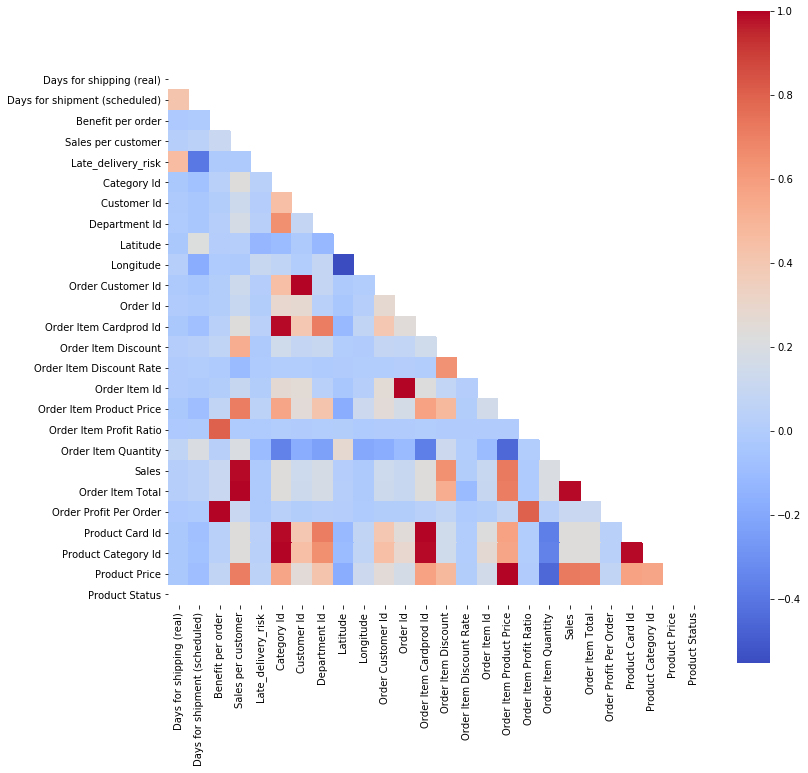

In [ ]:
numerical_variables = [ c for c in dataset.columns if dataset[c].dtypes != 'O']
fig, ax = plt.subplots(figsize = (12,12))
matrix = np.triu(dataset[numerical_variables].corr())
ax  = sns.heatmap(dataset[numerical_variables].corr(), cmap= 'coolwarm',square=True , mask=matrix)
plt.show()

In [ ]:
for names in categorical_variables:
    print(names)
    print(dataset[names].nunique())

Type
4
Delivery Status
4
Category Name
41
Customer City
555
Customer Country
2
Customer Email
1
Customer Fname
629
Customer Lname
1031
Customer Password
1
Customer Segment
3
Customer State
44
Customer Street
4814
Department Name
11
Market
5
Order City
2422
Order Country
143
order date (DateOrders)
10456
Order Region
23
Order State
854
Order Status
9
Product Image
90
Product Name
90
shipping date (DateOrders)
10421
Shipping Mode
4


In [ ]:
dataset.drop(columns=['Type','Delivery Status','shipping date (DateOrders)','Product Name','Product Image','Order Status','Order State','order date (DateOrders)','Order City','Department Name','Customer Street','Customer State','Customer Password','Order Country','Customer Lname','Customer Fname','Customer Email','Customer Country','Customer City'],inplace =True)

## Classifying Late Delivery Risk using Logistic Regression

In [ ]:
data = dataset.copy()
data['Shipping Mode'].unique()
data['Shipping Mode'] = data['Shipping Mode'].replace({'Standard Class':0,'First Class':1,'Second Class':2,'Same Day':3})
data.drop(columns=['Order Region'],inplace = True)

In [ ]:
df1 = pd.get_dummies(data['Customer Segment'],drop_first=True)
df2 = pd.get_dummies(data['Market'],drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.drop(columns=['Category Name','Customer Segment','Market'], inplace = True)
df = data['Late_delivery_risk']
data.drop(columns=['Late_delivery_risk'], inplace = True)
data = pd.concat([data,df], axis =1)
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred  = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1465   69]
 [   0 1743]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1534
           1       0.96      1.00      0.98      1743

    accuracy                           0.98      3277
   macro avg       0.98      0.98      0.98      3277
weighted avg       0.98      0.98      0.98      3277



## K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1335  199]
 [ 157 1586]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1534
           1       0.89      0.91      0.90      1743

    accuracy                           0.89      3277
   macro avg       0.89      0.89      0.89      3277
weighted avg       0.89      0.89      0.89      3277



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1465   69]
 [   0 1743]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1534
           1       0.96      1.00      0.98      1743

    accuracy                           0.98      3277
   macro avg       0.98      0.98      0.98      3277
weighted avg       0.98      0.98      0.98      3277



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1200  334]
 [ 267 1476]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1534
           1       0.82      0.85      0.83      1743

    accuracy                           0.82      3277
   macro avg       0.82      0.81      0.82      3277
weighted avg       0.82      0.82      0.82      3277



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1489   45]
 [  54 1689]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1534
           1       0.97      0.97      0.97      1743

    accuracy                           0.97      3277
   macro avg       0.97      0.97      0.97      3277
weighted avg       0.97      0.97      0.97      3277



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1468   66]
 [  12 1731]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1534
           1       0.96      0.99      0.98      1743

    accuracy                           0.98      3277
   macro avg       0.98      0.98      0.98      3277
weighted avg       0.98      0.98      0.98      3277



## Performing ABC analysis to find out the Product, Customer, Region, Day and Hour which contribute to 80% of the sales

In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset = dataset.groupby(['Product Name']).sum()
dataset = dataset.sort_values('Sales', ascending =False)
dataset['CUMULATIVE'] = dataset['Sales'].cumsum(axis = 0)
dataset = dataset.reset_index()

<IPython.core.display.Javascript object>

In [ ]:
#ABC Analysis
x = dataset['CUMULATIVE'].iloc[-1]

def ABC_category(value):
    if value > 0 and value < 0.8*x:
        return 'A'
    elif value >= 0.8*x and value < 0.95*x:
        return 'B'
    else:
        return 'C'
    
dataset['CATEGORY'] = dataset['CUMULATIVE'].apply(ABC_category)

In [ ]:
dataset['CATEGORY'].value_counts()

C    63
B    21
A     6
Name: CATEGORY, dtype: int64

In [ ]:
#Finding the most Important items which make up 80% of the sales 
dataset[['Product Name','Sales']].loc[dataset['CATEGORY'] == 'A']

,Product Name,Sales
0,Perfect Fitness Perfect Rip Deck,656710.549611
1,Nike Men's Free 5.0+ Running Shoe,567243.270861
2,Nike Men's Dri-FIT Victory Golf Polo,477000.000000
3,Diamondback Women's Serene Classic Comfort Bi,377374.853838
4,Nike Men's CJ Elite 2 TD Football Cleat,271939.091506
5,Field & Stream Sportsman 16 Gun Fire Safe,236788.166512


In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset = dataset.groupby(['Customer Id']).sum()
dataset = dataset.sort_values('Sales', ascending =False)
dataset['CUMULATIVE'] = dataset['Sales'].cumsum(axis = 0)
dataset = dataset.reset_index()
x = dataset['CUMULATIVE'].iloc[-1]
dataset['CATEGORY'] = dataset['CUMULATIVE'].apply(ABC_category)
dataset['CATEGORY'].value_counts()

<IPython.core.display.Javascript object>

A    3791
B    1887
C    1549
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

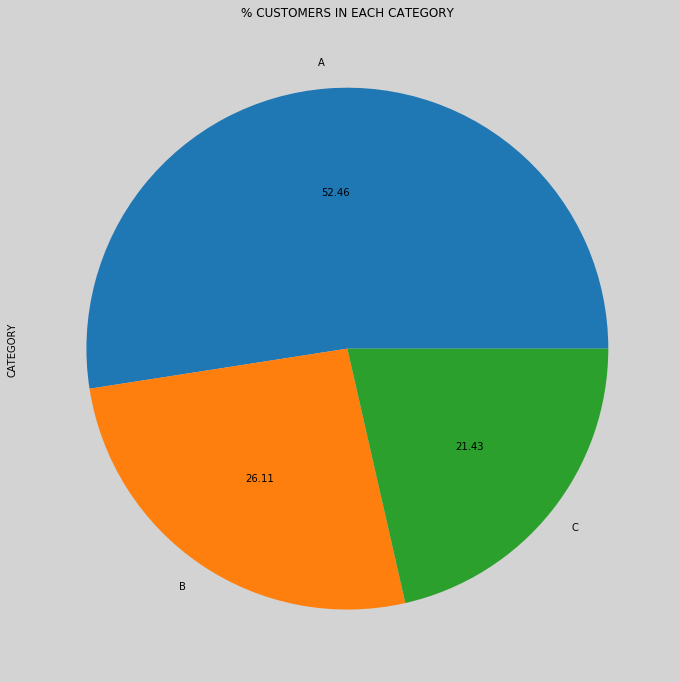

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
dataset['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% CUSTOMERS IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [ ]:
#Finding the most Important Customers which make up 80% of the sales 
dataset[['Customer Id','Sales']].loc[dataset['CATEGORY'] == 'A']

,Customer Id,Sales
0,633,3253.760063
1,8380,2979.790081
2,10529,2929.720093
3,1503,2909.810059
4,6316,2895.770061
...,...,...
3786,19450,327.750000
3787,19467,327.750000
3788,19442,327.750000
3789,19390,327.750000


In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset = dataset.groupby(['Order Region']).sum()
dataset = dataset.sort_values('Sales', ascending =False)
dataset['CUMULATIVE'] = dataset['Sales'].cumsum(axis = 0)
dataset = dataset.reset_index()
x = dataset['CUMULATIVE'].iloc[-1]
dataset['CATEGORY'] = dataset['CUMULATIVE'].apply(ABC_category)
dataset['CATEGORY'].value_counts()

<IPython.core.display.Javascript object>

A    10
C     7
B     6
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

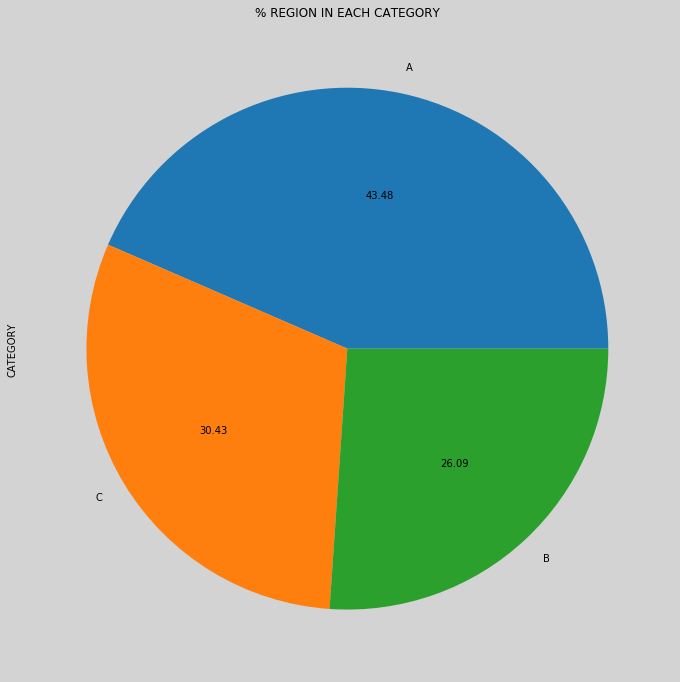

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
dataset['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% REGION IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [ ]:
#Finding the most Important Regions which make up 80% of the sales 
dataset[['Order Region','Sales']].loc[dataset['CATEGORY'] == 'A']

,Order Region,Sales
0,Western Europe,642688.051093
1,Central America,470041.668029
2,South America,259620.054193
3,Southern Europe,227992.194141
4,Northern Europe,227658.864084
5,Oceania,206638.963442
6,Southeast Asia,199213.502933
7,South Asia,163941.342455
8,Eastern Asia,156498.252688
9,Caribbean,133093.982363


In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset['shipping date (DateOrders)'] = pd.to_datetime(dataset['shipping date (DateOrders)'])
dataset['Day of week'] = dataset['shipping date (DateOrders)'].dt.day_name()
dataset['Hour'] = dataset['shipping date (DateOrders)'].dt.hour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset = dataset.groupby(['Day of week']).sum()
dataset = dataset.sort_values('Sales', ascending =False)
dataset['CUMULATIVE'] = dataset['Sales'].cumsum(axis = 0)
dataset = dataset.reset_index()
x = dataset['CUMULATIVE'].iloc[-1]
dataset['CATEGORY'] = dataset['CUMULATIVE'].apply(ABC_category)
dataset['CATEGORY'].value_counts()

A    5
B    1
C    1
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

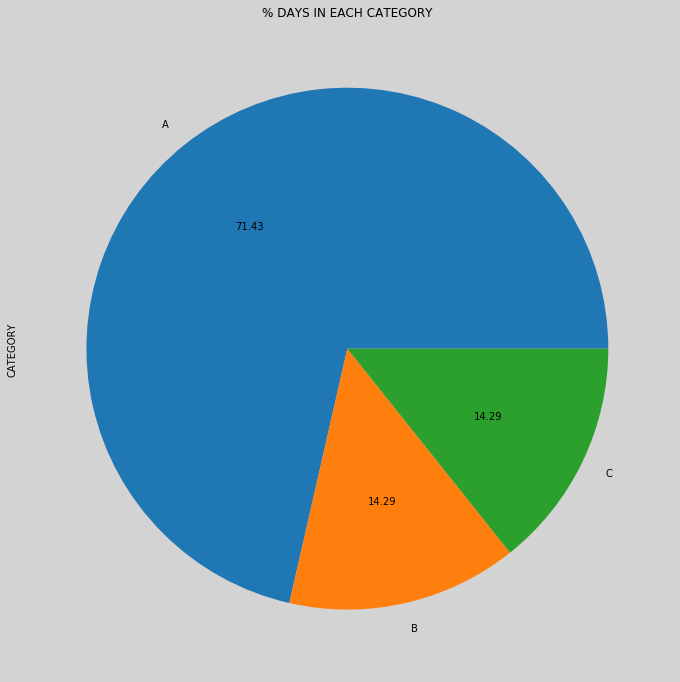

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
dataset['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% DAYS IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [ ]:
#Finding the most important Day which make up 80% of the sales
dataset[['Day of week','Sales']].loc[dataset['CATEGORY'] == 'A']

,Day of week,Sales
0,Saturday,511822.558364
1,Tuesday,500269.938507
2,Monday,500157.248748
3,Wednesday,493740.718257
4,Friday,470963.668419


In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset['shipping date (DateOrders)'] = pd.to_datetime(dataset['shipping date (DateOrders)'])
dataset['Day of week'] = dataset['shipping date (DateOrders)'].dt.day_name()
dataset['Hour'] = dataset['shipping date (DateOrders)'].dt.hour
dataset = dataset.groupby(['Hour']).sum()
dataset = dataset.sort_values('Sales', ascending =False)
dataset['CUMULATIVE'] = dataset['Sales'].cumsum(axis = 0)
dataset = dataset.reset_index()
x = dataset['CUMULATIVE'].iloc[-1]
dataset['CATEGORY'] = dataset['CUMULATIVE'].apply(ABC_category)
dataset['CATEGORY'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A    18
B     4
C     2
Name: CATEGORY, dtype: int64

In [ ]:
#Finding the most important Hour which make up 80% of the sales
dataset[['Hour','Sales']].loc[dataset['CATEGORY'] == 'A']

,Hour,Sales
0,15,161012.332941
1,5,157198.772653
2,21,155011.272832
3,23,149244.612685
4,0,149019.092494
5,2,148892.762642
6,16,146938.912517
7,12,146771.462336
8,3,144541.762570
9,18,143579.572275


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

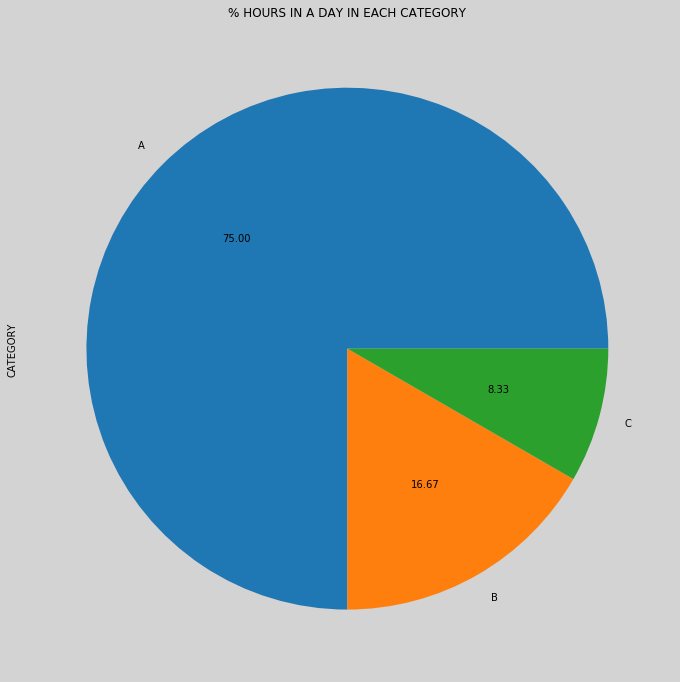

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
dataset['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% HOURS IN A DAY IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

## Average days taken for shipping based on Region

In [ ]:
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
dataset = dataset.groupby(['Order Region']).sum()
dataset = dataset.reset_index()
dataset = dataset[['Order Region','Days for shipping (real)']]

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
data.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)
data= data['Order Region'].value_counts()
data= pd.DataFrame(data)
data.reset_index(inplace=True)
data.columns = ['Order Region','Number of Orders']
dataset = dataset.merge(data, how='inner', on='Order Region')
dataset.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Order Region,Days for shipping (real),Number of Orders
0,Canada,268,78
1,Caribbean,2362,652
2,Central Africa,604,158
3,Central America,8288,2265
4,Central Asia,241,62


In [ ]:
dataset['Average Days for Shipping'] = dataset['Days for shipping (real)']/dataset['Number of Orders']
dataset

,Order Region,Days for shipping (real),Number of Orders,Average Days for Shipping
0,Canada,268,78,3.435897
1,Caribbean,2362,652,3.622699
2,Central Africa,604,158,3.822785
3,Central America,8288,2265,3.659161
4,Central Asia,241,62,3.887097
5,East Africa,608,167,3.640719
6,East of USA,2043,541,3.776340
7,Eastern Asia,2531,717,3.529986
8,Eastern Europe,1515,411,3.686131
9,North Africa,956,259,3.691120


# Thank you